In [1]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
# maplotlib.rcParams['font.family'] = 'AppleGothic Gothic   # Mac 사용자
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['axes.unicode_minus'] = False
import pandas as pd
import numpy as np

In [2]:
# 데이터 불러오기
df = pd.read_csv('../z20_data/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.shape

(768, 9)

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# 나이가 50 이상인 사람은 몇명인지?  # 89명
age50 = df['Age'] >= 50
len(df[age50])

89

In [7]:
# 나이가 50 이상이면서, 당뇨병 환자인 사람(Outcome=1)  # 43명
age50 = df['Age'] >= 50
diabetes = df['Outcome'] == 1
df[age50 & diabetes]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1
13,1,189,60,23,846,30.1,0.398,59,1
14,5,166,72,19,175,25.8,0.587,51,1
24,11,143,94,33,146,36.6,0.254,51,1
39,4,111,72,47,207,37.1,1.390,56,1
43,9,171,110,24,240,45.4,0.721,54,1
53,8,176,90,34,300,33.7,0.467,58,1
93,4,134,72,0,0,23.8,0.277,60,1


In [8]:
# 각 항목별 상관관계 함수 : 1과 가까운 수 일수록.. 상관관계가 있다라고 판단!
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


#### Heatmap : 밝을 수록 1에 가깝고, 어두울수록 0에 가까움
- 1에 가깝다 : 상관관계가 있다.
- 0에 가깝다 : 상관관계가 없다.

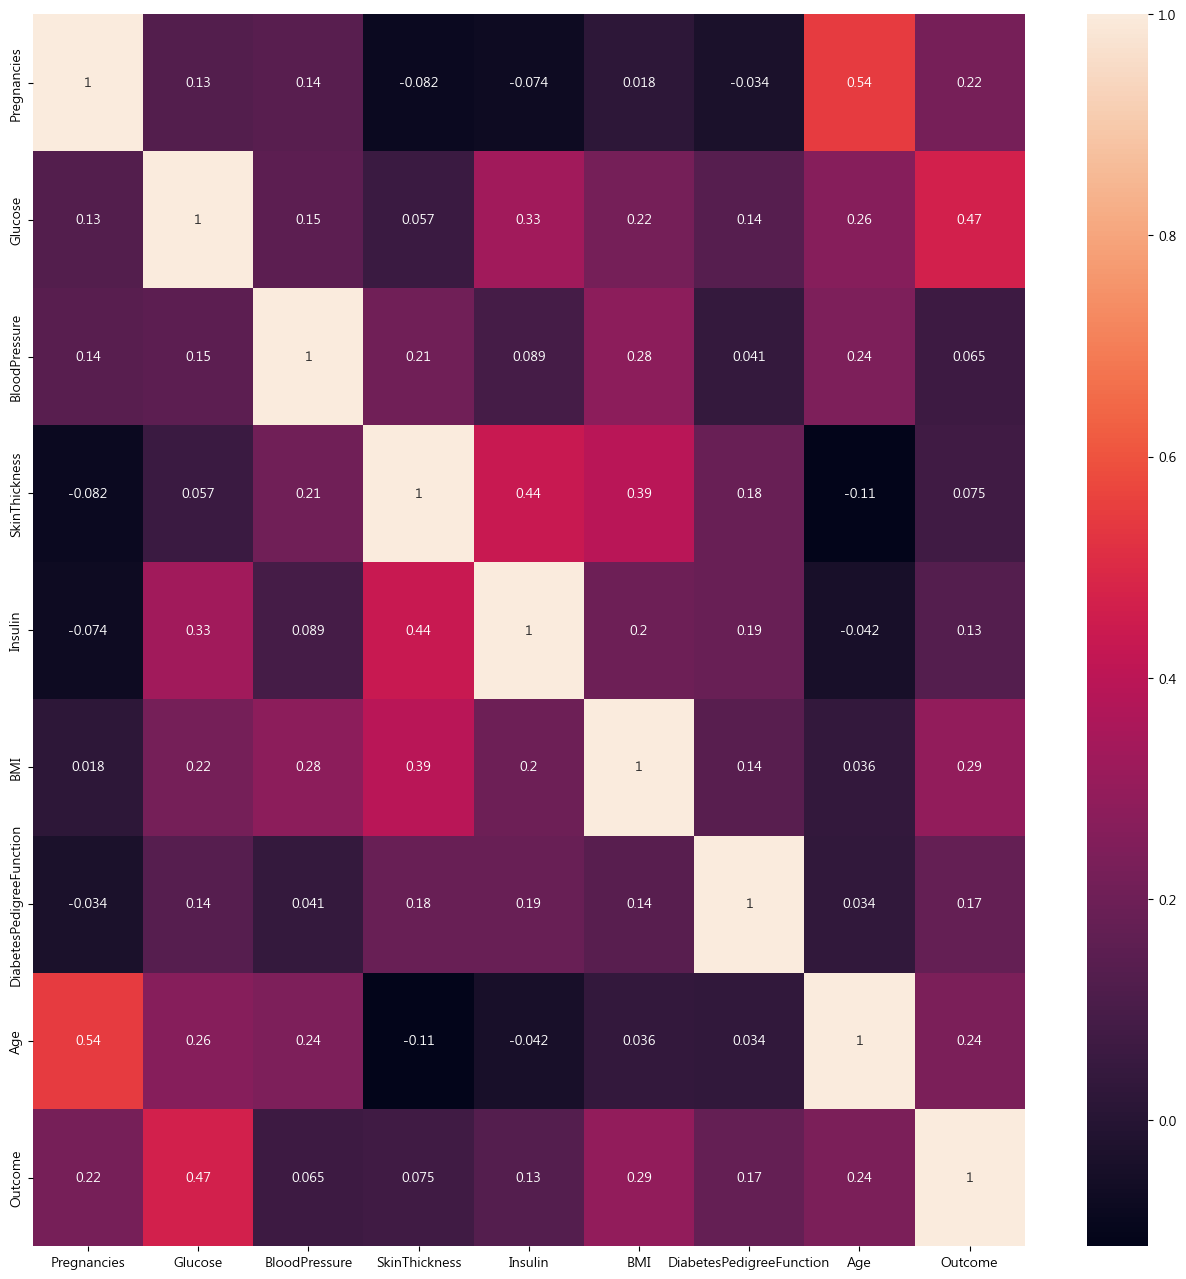

In [9]:
data_corr = df.corr()
fig = plt.figure(figsize=(16,16))
sns.heatmap(data_corr,annot=True)  # 각 항목별 데이터를 출력 시켜줌.
plt.show()

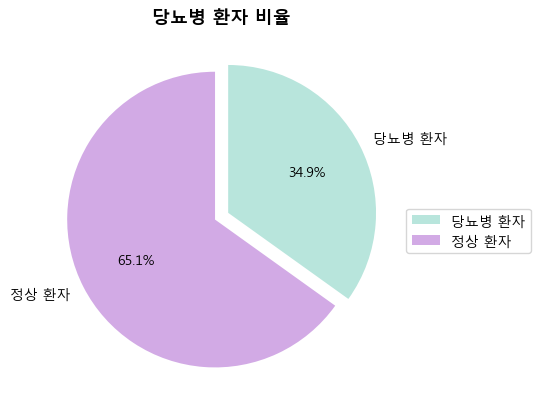

In [32]:
### 당뇨병 환자 비율 원그래프로 구하기
diabetes = df['Outcome'] == 1

df[diabetes]['Outcome'].count()
values = [df[diabetes]['Outcome'].count(), df[~diabetes]['Outcome'].count()]
title = ['당뇨병 환자','정상 환자']
explode=[0.05]*2
colors=['#B8E5DC','#D2AAE5']


plt.title('당뇨병 환자 비율',fontdict={'size':13,'weight':600})
plt.pie(values,labels=title, autopct='%.1f%%',explode=explode,startangle=90,\
    counterclock=False,colors=colors)
plt.legend(loc=(1,0.4))

In [48]:
# 연령대 조사
# df['Age'].describe()
# 21~30세까지 인원 출력 # 417명
len(df[df['Age']<=30]) # 최연소 나이가 21세니까 조건을 줄여도 된다.
len(df[(df['Age']>30) & (df['Age']<=40)])  # 157명
len(df[(df['Age']>40) & (df['Age']<=50)])  # 113명
len(df[(df['Age']>50) & (df['Age']<=60)])  # 54명
len(df[(df['Age']>60) & (df['Age']<=70)])  # 25명
len(df[(df['Age']>70) & (df['Age']<=80)])  # 1명
len(df[(df['Age']>80) & (df['Age']<=90)])  # 1명
len(df[(df['Age']>90) & (df['Age']<=100)])  # 0명


0

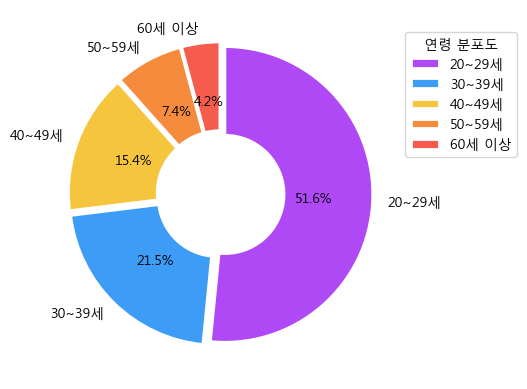

In [58]:
values = [len(df[df['Age']<30]),len(df[(df['Age']>=30) & (df['Age']<40)]),\
    len(df[(df['Age']>=40) & (df['Age']<50)]),len(df[(df['Age']>=50) & (df['Age']<60)]),\
    len(df[(df['Age']>=60)])]
title = ['20~29세','30~39세','40~49세','50~59세','60세 이상']
explode=[0.03]*5
colors = ['#AF48F5','#3D9CF5','#F5C53D','#F58B3D','#F55C4D']
wedgeprops = {'width':0.6, 'edgecolor':'w','linewidth':2}

plt.pie(values,labels=title,autopct='%.1f%%',explode=explode,startangle=90,counterclock=False,\
    colors=colors, wedgeprops=wedgeprops)
plt.legend(loc=(1,0.6),title='연령 분포도')
plt.show()